# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [2]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first

Given a list of values, there are several ways to count the frequency of each value.

In [3]:
t = [1, 2, 2, 3, 5]

You can use a Python dictionary:

In [4]:
hist = {}
for x in t:
    hist[x] = hist.get(x, 0) + 1
    
hist

{1: 1, 2: 2, 3: 1, 5: 1}

You can use a `Counter` (which is a dictionary with additional methods):

In [5]:
from collections import Counter
counter = Counter(t)
counter

Counter({1: 1, 2: 2, 3: 1, 5: 1})

Or you can use the `Hist` object provided by `thinkstats2`:

In [6]:
import thinkstats2
hist = thinkstats2.Hist([1, 2, 2, 3, 5])
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

`Hist` provides `Freq`, which looks up the frequency of a value.

In [7]:
hist.Freq(2)

2

You can also use the bracket operator, which does the same thing.

In [8]:
hist[2]

2

If the value does not appear, it has frequency 0.

In [9]:
hist[4]

0

The `Values` method returns the values:

In [10]:
hist.Values()

dict_keys([1, 2, 3, 5])

So you can iterate the values and their frequencies like this:

In [11]:
for val in sorted(hist.Values()):
    print(val, hist[val])

1 1
2 2
3 1
5 1


Or you can use the `Items` method:

In [12]:
for val, freq in hist.Items():
     print(val, freq)

1 1
2 2
3 1
5 1


`thinkplot` is a wrapper for `matplotlib` that provides functions that work with the objects in `thinkstats2`.

For example `Hist` plots the values and their frequencies as a bar graph.

`Config` takes parameters that label the x and y axes, among other things.

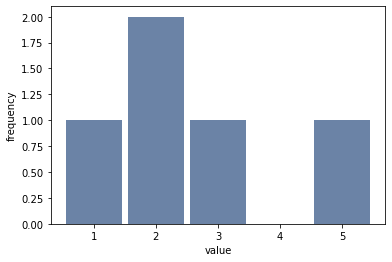

In [13]:
import thinkplot
thinkplot.Hist(hist)
thinkplot.Config(xlabel='value', ylabel='frequency')

As an example, I'll replicate some of the figures from the book.

First, I'll load the data from the pregnancy file and select the records for live births.

In [14]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

Here's the histogram of birth weights in pounds.  Notice that `Hist` works with anything iterable, including a Pandas Series.  The `label` attribute appears in the legend when you plot the `Hist`. 

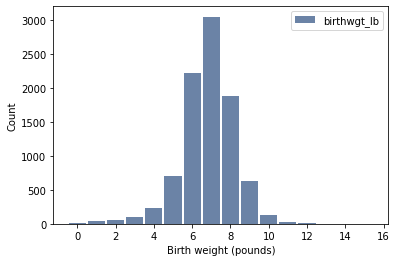

In [15]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

Before plotting the ages, I'll apply `floor` to round down:

In [16]:
ages = np.floor(live.agepreg)

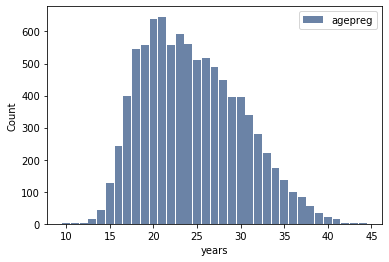

In [17]:
hist = thinkstats2.Hist(ages, label='agepreg')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='years', ylabel='Count')

As an exercise, plot the histogram of pregnancy lengths (column `prglngth`).

In [18]:
lengths = np.floor(live.prglngth)

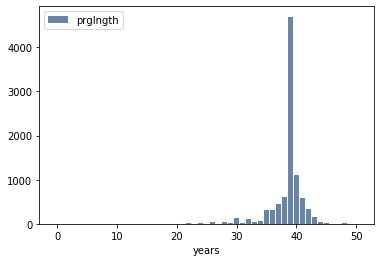

In [19]:
hist2 = thinkstats2.Hist(lengths, label='prglngth')
thinkplot.Hist(hist2)
thinkplot.Config(xlabel='years')

`Hist` provides smallest, which select the lowest values and their frequencies.

In [20]:
for weeks, freq in hist.Smallest(10):
    print(weeks, freq)

10.0 2
11.0 1
12.0 1
13.0 14
14.0 43
15.0 128
16.0 242
17.0 398
18.0 546
19.0 559


Use `Largest` to display the longest pregnancy lengths.

In [21]:
for weeks, freq in hist.Largest(10):
    print(int(weeks), "weeks | freq: ", freq)

44 weeks | freq:  1
43 weeks | freq:  1
42 weeks | freq:  2
41 weeks | freq:  14
40 weeks | freq:  21
39 weeks | freq:  34
38 weeks | freq:  55
37 weeks | freq:  83
36 weeks | freq:  99
35 weeks | freq:  138


From live births, we can select first babies and others using `birthord`, then compute histograms of pregnancy length for the two groups.

In [22]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = thinkstats2.Hist(firsts.prglngth, label='first')
other_hist = thinkstats2.Hist(others.prglngth, label='other')

We can use `width` and `align` to plot two histograms side-by-side.

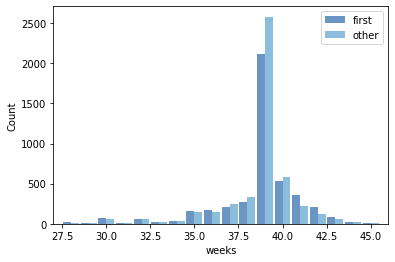

In [23]:
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count', xlim=[27, 46])

`Series` provides methods to compute summary statistics:

In [24]:
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()

Here are the mean and standard deviation:

In [25]:
mean, std

(38.56055968517709, 2.702343810070593)

As an exercise, confirm that `std` is the square root of `var`:

In [26]:
import math
math.sqrt(var) == std

True

Here's are the mean pregnancy lengths for first babies and others:

In [27]:
firsts.prglngth.mean(), others.prglngth.mean()

(38.60095173351461, 38.52291446673706)

And here's the difference (in weeks):

In [28]:
firsts.prglngth.mean() - others.prglngth.mean()

0.07803726677754952

This functon computes the Cohen effect size, which is the difference in means expressed in number of standard deviations:

In [29]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

Compute the Cohen effect size for the difference in pregnancy length for first babies and others.

In [30]:
CohenEffectSize(firsts.prglngth, others.prglngth)

0.028879044654449883

## Exercises

Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others. 

Compute Cohen’s effect size to quantify the difference between the groups.  How does it compare to the difference in pregnancy length?

In [31]:
mean = live.totalwgt_lb.mean()
var = live.totalwgt_lb.var()
std = live.totalwgt_lb.std()
print('mean: {}, var: {}, std: {}'.format(mean, var, std))
print('firstborn totalwgt_lb mean: {} lbs, other totalwgt_lb mean: {} lbs'.format(firsts.totalwgt_lb.mean(), others.totalwgt_lb.mean()))
print("Difference in lbs: {} lbs".format(firsts.totalwgt_lb.mean() - others.totalwgt_lb.mean()))
firsts.totalwgt_lb.mean() - others.totalwgt_lb.mean()

#First babies are slightly (0.125lbs) lighter

mean: 7.265628457623368, var: 1.9832904288326532, std: 1.4082934455690168
firstborn totalwgt_lb mean: 7.201094430437772 lbs, other totalwgt_lb mean: 7.325855614973262 lbs
Difference in lbs: -0.12476118453549034 lbs


-0.12476118453549034

In [32]:

difference = CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb) 
print("difference: {}".format(difference))

difference: -0.088672927072602


For the next few exercises, we'll load the respondent file:

In [33]:
resp = nsfg.ReadFemResp()

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=FEM&section=R&subSec=7876&srtLabel=607543).

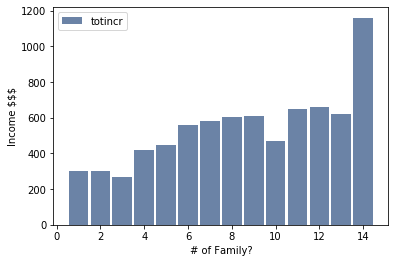

In [34]:
hist3 = thinkstats2.Hist(resp.totincr, label='totincr')
thinkplot.Hist(hist3)
thinkplot.Config(xlabel="# of Family?", ylabel='Income $$$')

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

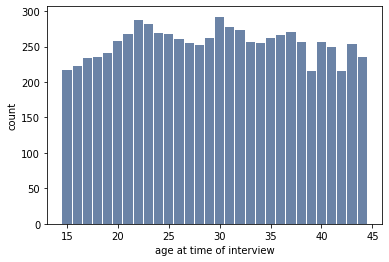

In [35]:
import thinkstats2 as ts2
hist4 = ts2.Hist(resp.age_r)
thinkplot.Hist(hist4)
thinkplot.Config(xlabel="age at time of interview", ylabel='count')

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

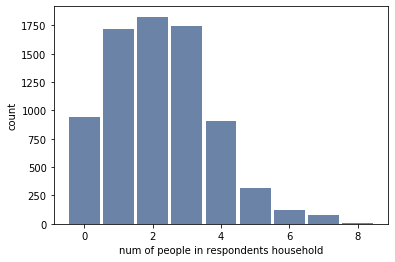

In [36]:
hist5 = ts2.Hist(resp.numfmhh)
import thinkplot as tp
tp.Hist(hist5)
tp.Config(xlabel='num of people in respondents household', ylabel='count')

Make a histogram of <tt>parity</tt>, the number of children borne by the respondent.  How would you describe this distribution?

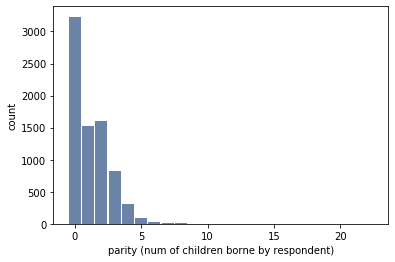

In [37]:
# Distribution is positive and skewed to the right.

hist6 = ts2.Hist(resp.parity)
tp.Hist(hist6)
tp.Config(xlabel='parity (num of children borne by respondent)', ylabel='count')

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [38]:
hist6.Largest(10)

[(22, 1),
 (16, 1),
 (10, 3),
 (9, 2),
 (8, 8),
 (7, 15),
 (6, 29),
 (5, 95),
 (4, 309),
 (3, 828)]

In [39]:
for parity, count in hist6.Smallest(10):
    print(int(parity), "num children: | count: ", count)

0 num children: | count:  3230
1 num children: | count:  1519
2 num children: | count:  1603
3 num children: | count:  828
4 num children: | count:  309
5 num children: | count:  95
6 num children: | count:  29
7 num children: | count:  15
8 num children: | count:  8
9 num children: | count:  2


Let's investigate whether people with higher income have higher parity.  Keep in mind that in this study, we are observing different people at different times during their lives, so this data is not the best choice for answering this question.  But for now let's take it at face value.

Use <tt>totincr</tt> to select the respondents with the highest income (level 14).  Plot the histogram of <tt>parity</tt> for just the high income respondents.

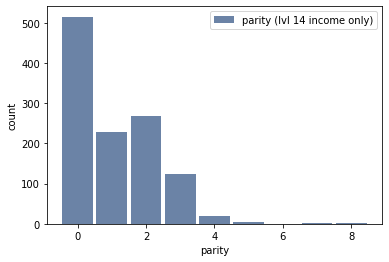

In [40]:
lvl_14_income = resp[resp.totincr == 14]
hist7 = thinkstats2.Hist(lvl_14_income.parity)
thinkplot.Hist(hist7, label='parity (lvl 14 income only)')
thinkplot.Config(xlabel='parity', ylabel='count')

Find the largest parities for high income respondents.

In [41]:
hist7.Largest()

[(8, 1), (7, 1), (5, 5), (4, 19), (3, 123), (2, 267), (1, 229), (0, 515)]

Compare the mean <tt>parity</tt> for high income respondents and others.

In [42]:
not_lvl_14_income = resp[resp.totincr < 14]
mean_high_income_parity = lvl_14_income.parity.mean()
mean_other_income_parity = not_lvl_14_income.parity.mean()
print('Mean parity among high income earners (lvl 14): {}'.format(mean_high_income_parity))
print('Mean parity among low income earners (< lvl 14): {}'.format(mean_other_income_parity))

Mean parity among high income earners (lvl 14): 1.0758620689655172
Mean parity among low income earners (< lvl 14): 1.2495758136665125


Compute the Cohen effect size for this difference.  How does it compare with the difference in pregnancy length for first babies and others?

In [43]:
print('CohenEffectSize (high income vs low income parity): {}'.format(CohenEffectSize(lvl_14_income.parity, not_lvl_14_income.parity)))

# The Cohen Effect Size is roughly 10x stronger than the difference in pregnancy length. However, taking into account the design of the study (oversampled Hispanics, African-Americans and teenagers at rates higher than their representation in the US population), we should not jump to conclusions. 

CohenEffectSize (high income vs low income parity): -0.1251185531466061


In [ ]:
"""
The below numbers are Cohen Effect sizes.
Difference between high income respondents and others (-0.1251185531466061) / Difference in pregnancy length (0.028879044654449883) = -4.3325, not 10? 
"""